In [10]:
# 구글 코랩에서 한글 폰트를 설치합니다.
!apt-get update -qq
!apt-get install -qq fonts-nanum

# 설치된 폰트를 확인합니다.
!fc-list :lang=ko

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126101 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf: NanumSquareRound,나눔스퀘어라운드,NanumSquareRound Bold,나눔스퀘어라운드 Bold:style=Bold,Regular
/usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf: NanumGothicCoding,나눔고딕코딩:style=Bold
/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf: NanumSquareRound,나눔스퀘어라운드,NanumSquareRound Regular,나눔스퀘어라운드 Regular:style=Regular
/usr/share/fonts/truetype/nanum/NanumSquareB.ttf: NanumSquare,나눔스퀘어,NanumSquare Bold,나눔스퀘어 Bold:style=Bold
/usr/share/fo

In [1]:
# 세션 다시 시작하기
# matplotlib에 폰트를 설정합니다.

# matplotlib 라이브러리를 불러옵니다.
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

# 설치된 폰트 목록을 갱신하고, 'NanumGothic' 폰트를 기본 폰트로 설정합니다.
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

# 한글이 깨지지 않도록 하기 위해서 minus 표시를 설정합니다.
plt.rcParams['axes.unicode_minus'] = False

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

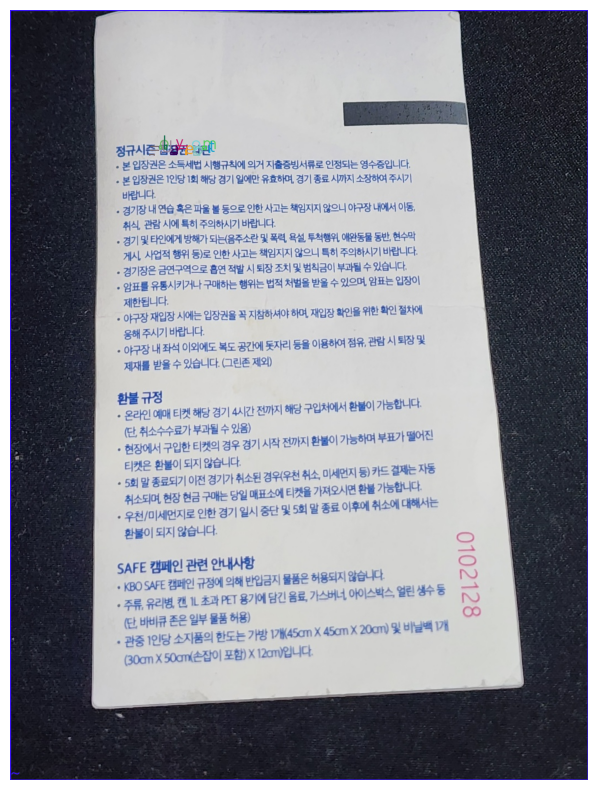

🔍 OCR 결과:
인장궤 약교
즌 입장권 약관

 



In [2]:
!apt-get update
!apt-get install -y tesseract-ocr
!apt-get install -y tesseract-ocr-kor
!pip install pytesseract Pillow

import pytesseract
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

# 이미지 로딩
image = cv2.imread('test.jpg')  # 'test.jpg'는 분석할 이미지 파일명으로 변경
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # RGB로 변환
image_pil = Image.fromarray(image_rgb)

# Tesseract로 텍스트 추출 (구성 옵션 '--psm 6'을 사용)
detection_boxes = pytesseract.image_to_boxes(image_pil)  # 문자 경계 상자 추출
ocr_result = pytesseract.image_to_string(image_pil, lang='kor')  # 한글 추출

# 폰트 설정 (Colab에서는 기본적인 한글 폰트를 사용할 수 있음)
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"  # 폰트 경로 (필요시 수정)
font = ImageFont.truetype(font_path, 30)

# 이미지에 경계 상자와 텍스트를 그리기 위한 준비
draw = ImageDraw.Draw(image_pil)
np.random.seed(42)

# Tesseract로 추출된 문자 경계 상자와 텍스트를 이미지에 표시
for box in detection_boxes.splitlines():
    b = box.split()
    x, y, w, h = int(b[1]), int(b[2]), int(b[3]), int(b[4])

    # 텍스트와 경계 사각형 그리기
    color = tuple(np.random.randint(0, 256, 3).tolist())

    # 사각형 그리기 (좌표 순서 변경)
    draw.rectangle([x, image_pil.height - h, w, image_pil.height - y], outline=color, width=2)
    draw.text((x, image_pil.height - y - 30), b[0], font=font, fill=color)

# 이미지 출력
plt.figure(figsize=(10, 10))
plt.imshow(np.asarray(image_pil))
plt.axis('off')
plt.show()

# OCR 결과 출력
print("🔍 OCR 결과:")
print(ocr_result)

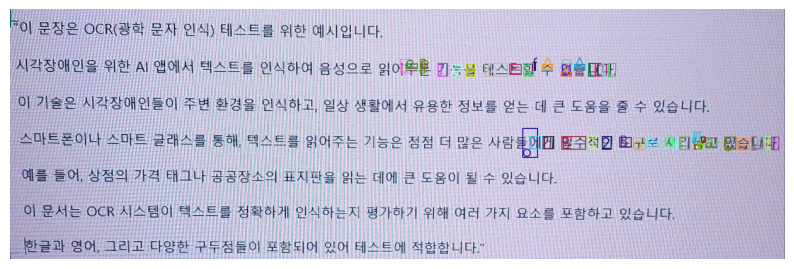

🔍 OCR 결과:
니다.

브

} 수 있습
ㅅㅅ

기능을 테스트할

즈브

 

 

니다.

고 있습

                         
 

2
브

도구로싸리

에게 필수적인

|
700

이

  



In [3]:
image = cv2.imread('test2.jpg')  # 'test.jpg'는 분석할 이미지 파일명으로 변경
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # RGB로 변환
image_pil = Image.fromarray(image_rgb)

# Tesseract로 텍스트 추출 (구성 옵션 '--psm 6'을 사용)
detection_boxes = pytesseract.image_to_boxes(image_pil)  # 문자 경계 상자 추출
ocr_result = pytesseract.image_to_string(image_pil, lang='kor')  # 한글 추출

# 폰트 설정 (Colab에서는 기본적인 한글 폰트를 사용할 수 있음)
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"  # 폰트 경로 (필요시 수정)
font = ImageFont.truetype(font_path, 30)

# 이미지에 경계 상자와 텍스트를 그리기 위한 준비
draw = ImageDraw.Draw(image_pil)
np.random.seed(42)

# Tesseract로 추출된 문자 경계 상자와 텍스트를 이미지에 표시
for box in detection_boxes.splitlines():
    b = box.split()
    x, y, w, h = int(b[1]), int(b[2]), int(b[3]), int(b[4])

    # 텍스트와 경계 사각형 그리기
    color = tuple(np.random.randint(0, 256, 3).tolist())

    # 사각형 그리기 (좌표 순서 변경)
    draw.rectangle([x, image_pil.height - h, w, image_pil.height - y], outline=color, width=2)
    draw.text((x, image_pil.height - y - 30), b[0], font=font, fill=color)

# 이미지 출력
plt.figure(figsize=(10, 10))
plt.imshow(np.asarray(image_pil))
plt.axis('off')
plt.show()

# OCR 결과 출력
print("🔍 OCR 결과:")
print(ocr_result)